## Устанавливаем нужные пакеты и потом импортируем их

In [2]:
!pip install numpy
!pip install matplotlib
!pip install sounddevice
!pip install scipy

     -------------------------------------- 44.1/44.1 MB 502.9 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

## Шумы

*Белый шум* - стационарный шум, спектральные составляющие которого равномерно распределены по всему диапазону задействованных частот. 
В нем частоты всего звукового диапазона, который человеческий слух может воспринять: от 20 до 20 000 Гц.
Другими словами, белый шум – это «смесь» звуков, воспроизводимых одновременно на всех частотах, которые воспринимает наше ухо. 


*Аддитивный белый гауссовский шум (AWGN)* - базовая модель шума, используемая в теории информации для имитации эффекта многих случайных процессов, происходящих в природе. Модификаторы обозначают специфические характеристики:

**Аддитивный**, потому что он добавляется к любому шуму, который может быть присущ информационной системе.

**Белый шум** относится к идее о том, что он имеет равномерную спектральную плотность мощности во всей полосе частот информационной системы. Это аналогия с белым цветом, который может быть реализован за счет равномерного излучения на всех частотах в видимом спектре.

**Гауссовский**, потому что он имеет нормальное распределение во временной области со средним значением во временной области, равным нулю (гауссовский процесс).



In [4]:
#глобальные переменные, которые нам нужны для генерации всех шумов. Можно обойтись и без них.

duration = 5  # Продолжительность в секундах
sample_rate = 4100  # Частота дискретизации в Гц

In [5]:
# счиетаем, сколько элементов будем генерировать. 
#Не забываем привести к инту, так как и длительность (duration) и частота (sample_rate) могут быть вещественными

num_samples = int(duration * sample_rate)

In [6]:
#генерируем просто белый шум, не озадачиваесь его распределением. И печатаем.

white_noise_simple = np.random.random(num_samples)

print(white_noise_simple)

[0.62740802 0.26377449 0.71471654 ... 0.41780702 0.60503806 0.48080388]


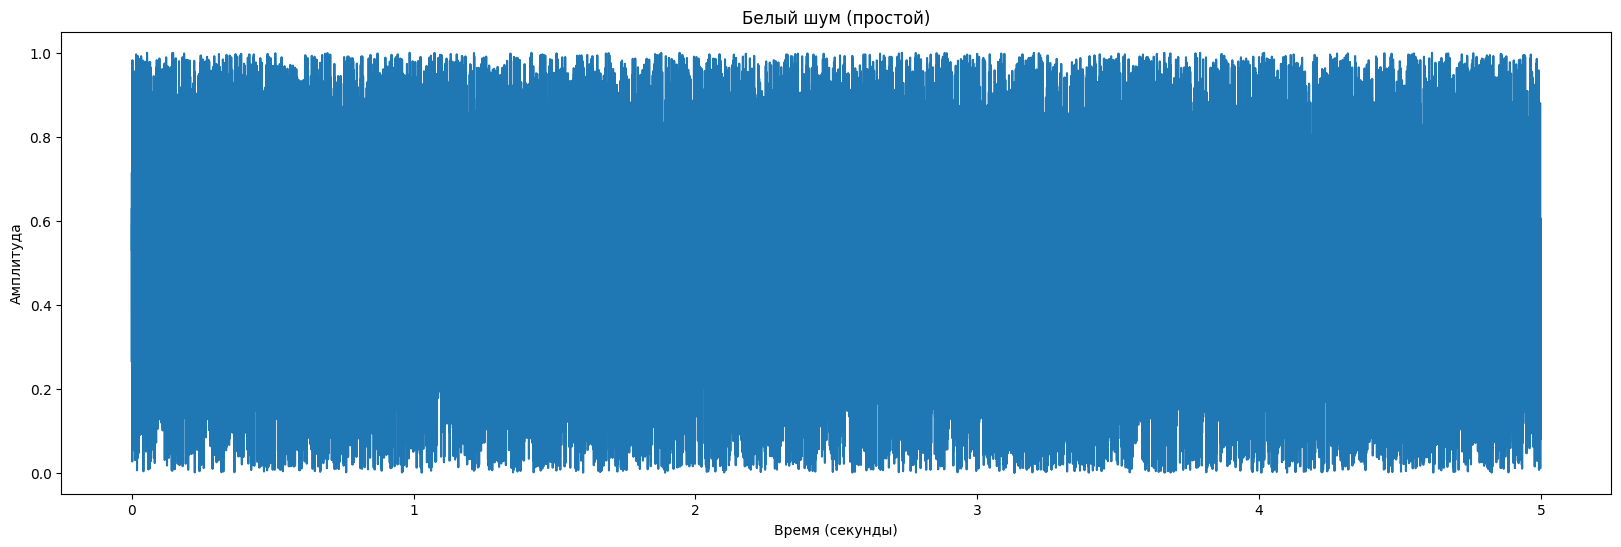

In [7]:
# отрисовываем, что получилось

# создаем временную шкалу. Считаем, что она начинается с 0, до окончания записи (duretion). 
# Между этими значениями равномерно заполняем ряд time_axis, чтобы в нем оказалось ровно столько элементов, сколько во временном ряду
time_axis = np.linspace(0, duration, len(white_noise_simple)) 

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))  

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(time_axis, white_noise_simple)

# заголовки
plt.title('Белый шум (простой)')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()


In [8]:
# слушаем, что получилось
sd.play(white_noise_simple, sample_rate)
sd.wait()

KeyboardInterrupt: 

In [9]:
# генерируем гауссовский белый шум
# loc - медиана
# scale - стандартная девиация

white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples)

print(white_noise_g)

[ 1.24415116  0.14267784  1.16536856 ...  1.66452409  0.03034287
 -0.02858141]


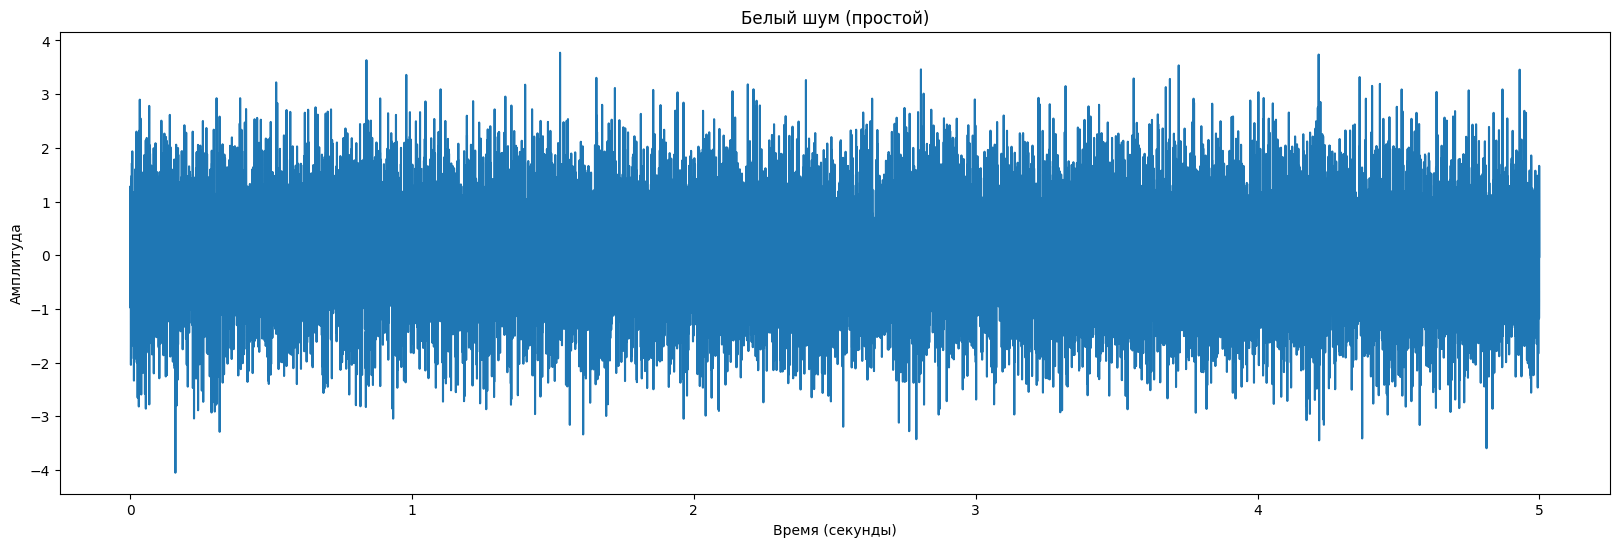

In [10]:
# отрисовываем, что получилось

# создаем временную шкалу. Считаем, что она начинается с 0, до окончания записи (duretion). 
# Между этими значениями равномерно заполняем ряд time_axis, чтобы в нем оказалось ровно столько элементов, сколько во временном ряду
time_axis = np.linspace(0, duration, len(white_noise_g)) 

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))  

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(time_axis, white_noise_g)

# заголовки
plt.title('Белый шум (простой)')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()


In [11]:
# слушаем, что получилось
sd.play(white_noise_g, sample_rate)
sd.wait()

C:\Users\pdd\AppData\Local\Temp\ipykernel_8468\1023261976.py:25: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c0, c1],


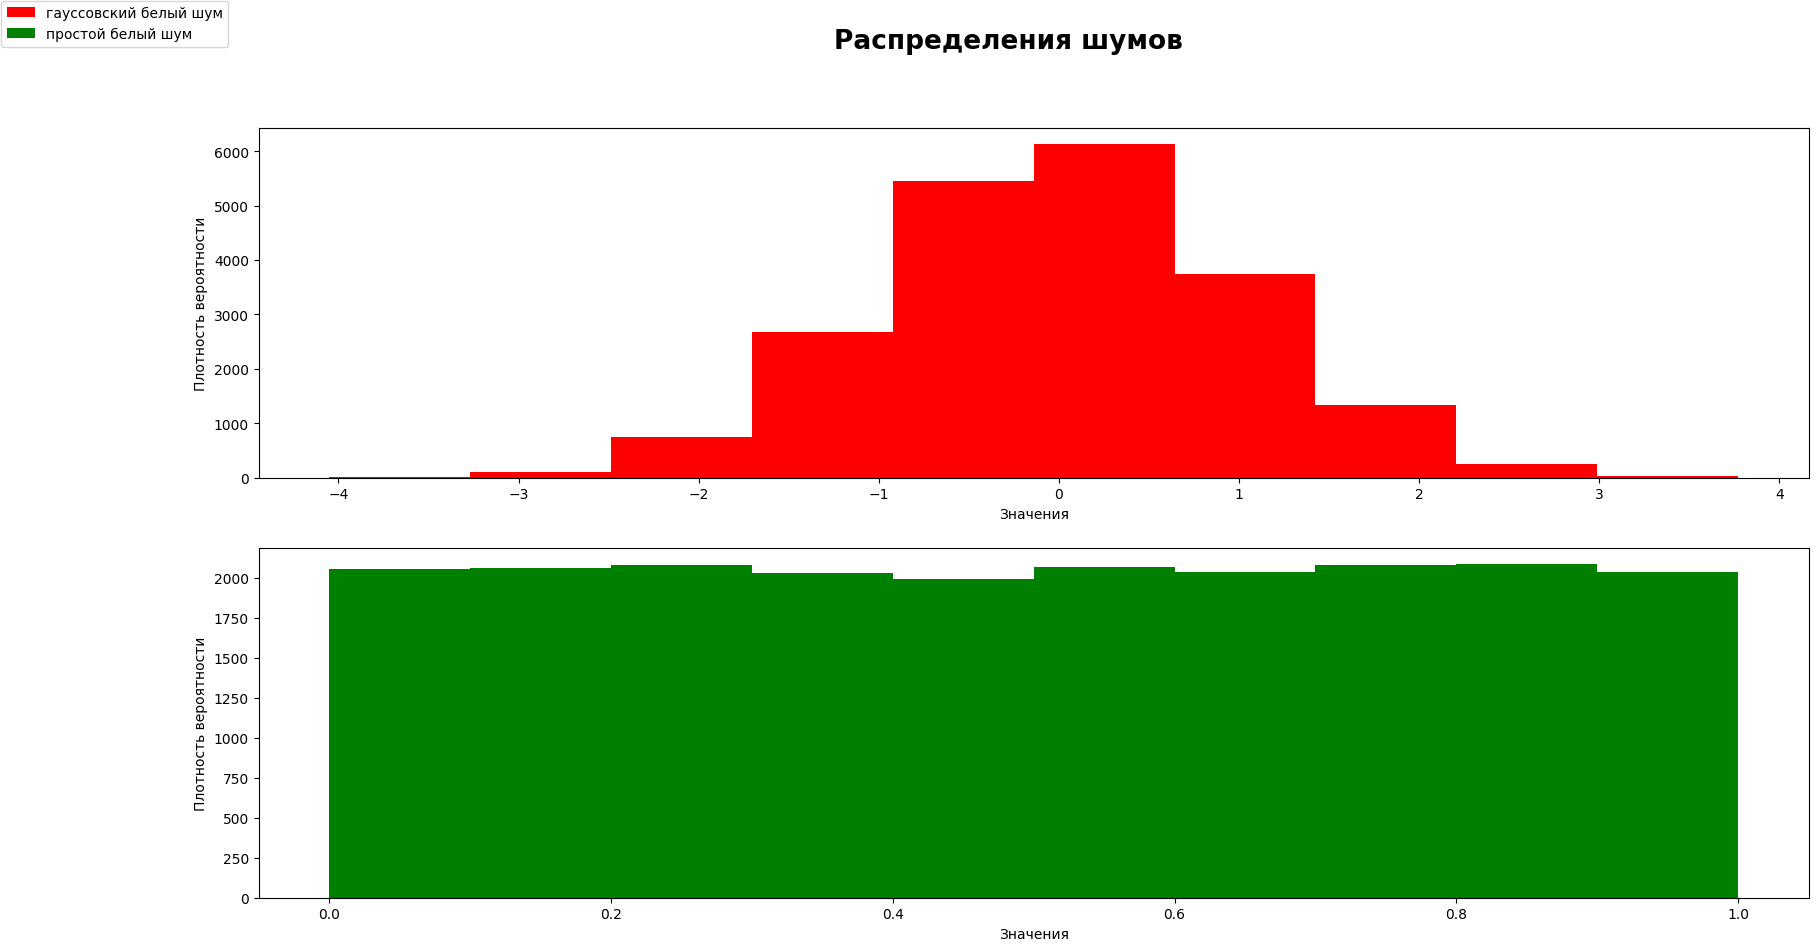

In [12]:
# давайте сравним распеределения двух шумов. Это можно сделать с помощью функции hist



# хотим нарисовать все на одном рисунке. Нам нужно 2 рисунка, один под другим.
fig, axs = plt.subplots(2, 1, figsize=(20, 10))


# общий заголовок для всей картинки
fig.suptitle('Распределения шумов', fontsize=19, fontweight='bold')

labels = ["гауссовский белый шум", "простой белый шум"]

# определяем, что будем отрисовывать на 1 графике. По x - амплитуды, по y - плотность вероятности
c0 = axs[0].hist(white_noise_g, color="red")
axs[0].set_xlabel('Значения')
axs[0].set_ylabel('Плотность вероятности')

# определяем, что будем отрисовывать. По x - амплитуды, по y - плотность вероятности
c1 = axs[1].hist(white_noise_simple, color ="green")
axs[1].set_xlabel('Значения')
axs[1].set_ylabel('Плотность вероятности')

# отрисовываем общую легенду
fig.legend([c0, c1],
           labels=labels,
           loc='upper left',
           borderaxespad=0.1)

plt.show()


*Коричневый шум* - больше выделяются низкие частоты (имеют высокие амплитуды). Получается интегрирвание белого шума. 

Для этого нужно:
Создать белый гауссовкий шум с нулевой медианой.
Вычислить кумулятивную сумму полученного белого шума
От кумулятивной суммы отнять медианное значение
Отмасштабировать

На заметку:
Коричневый шум имеет ОГРОМНОЕ количество энергии на очень низких частотах и теоретически бесконечную энергию на частоте 0 Гц. Это, скорее всего, перегрузит любую разумную систему, поэтому вам, вероятно, понадобится коричневый шум с «ограниченной полосой пропускания». Самый простой способ сделать это — использовать фильтр верхних и нижних частот первого порядка вместо интегратора. Например, фильтр верхних частот на частоте 20 Гц и фильтр нижних частот на частоте 40 Гц.


In [13]:
# белый шум у нас уже есть. Давайте просто работать с ним

cumsum = np.cumsum(white_noise_g)  # кумулятивная сумма
brown_noise = cumsum - np.mean(cumsum)  # обнуляем медианное значение
scale_coeff =  np.max(np.abs(brown_noise))   # коэффициент для масшабирования, чтобы весь ряд находился между -1 и 1

brown_noise = brown_noise / scale_coeff  # Нормализация к [-1, 1] . Каждый элемент ряда делится на масштабирующий коэффициент

print(brown_noise)
print(white_noise_g)

[-0.9212975  -0.92063768 -0.91524841 ...  0.30939035  0.30953067
  0.3093985 ]
[ 1.24415116  0.14267784  1.16536856 ...  1.66452409  0.03034287
 -0.02858141]


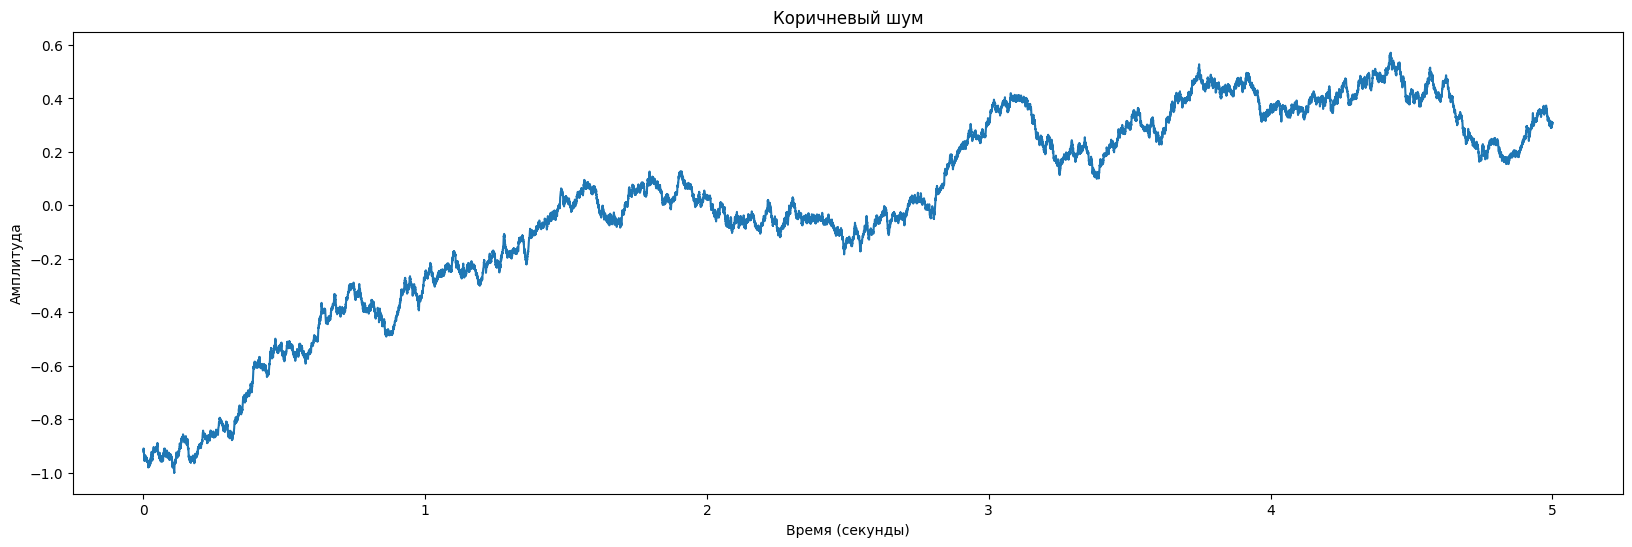

In [14]:
# отрисовываем, что получилось 
# создаем временную шкалу. Считаем, что она начинается с 0, до окончания записи (duretion). 
# Между этими значениями равномерно заполняем ряд time_axis, чтобы в нем оказалось ровно столько элементов, сколько во временном ряду
time_axis = np.linspace(0, duration, len(brown_noise)) 

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))  

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(time_axis, brown_noise)

# заголовки
plt.title('Коричневый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()



In [15]:
# слушаем, что получилось
sd.play(brown_noise, sample_rate)
sd.wait()

*Розовый шум* или фликкер (мерцающий) шум - очень похож на белый. 

Розовый шум может быть сгенерирован путем первой генерации сигнала белого шума, преобразования его Фурье, затем деления амплитуд различных частотных составляющих на квадратный корень из частоты (в одном измерении) или на частоту (в двух измерениях) и т.д. Это эквивалентно пространственной фильтрации (свертке) сигнала белого шума с помощью фильтра от белого к розовому. Для сигнала длины N в одном измерении фильтр имеет следующий вид:

![Alt text](image-1.png)

In [19]:
# применение фильтра для генерации розового шума

N = len(white_noise_g)
N2 = N//2

print(N)
print(N2)

pink_noise_f = []

for el in white_noise_g:
  
    s = 0
    for k in range(1,N2):
        s += 1/np.sqrt(k) * np.cos(2*np.pi*k*(el-1)/N)
    s *=2
    s = s + 1 + np.cos(np.pi*(el-1))/np.sqrt(N2)

    pink_noise_f.append(s/N)
    print(len(pink_noise_f))


20500
10250
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274


KeyboardInterrupt: 

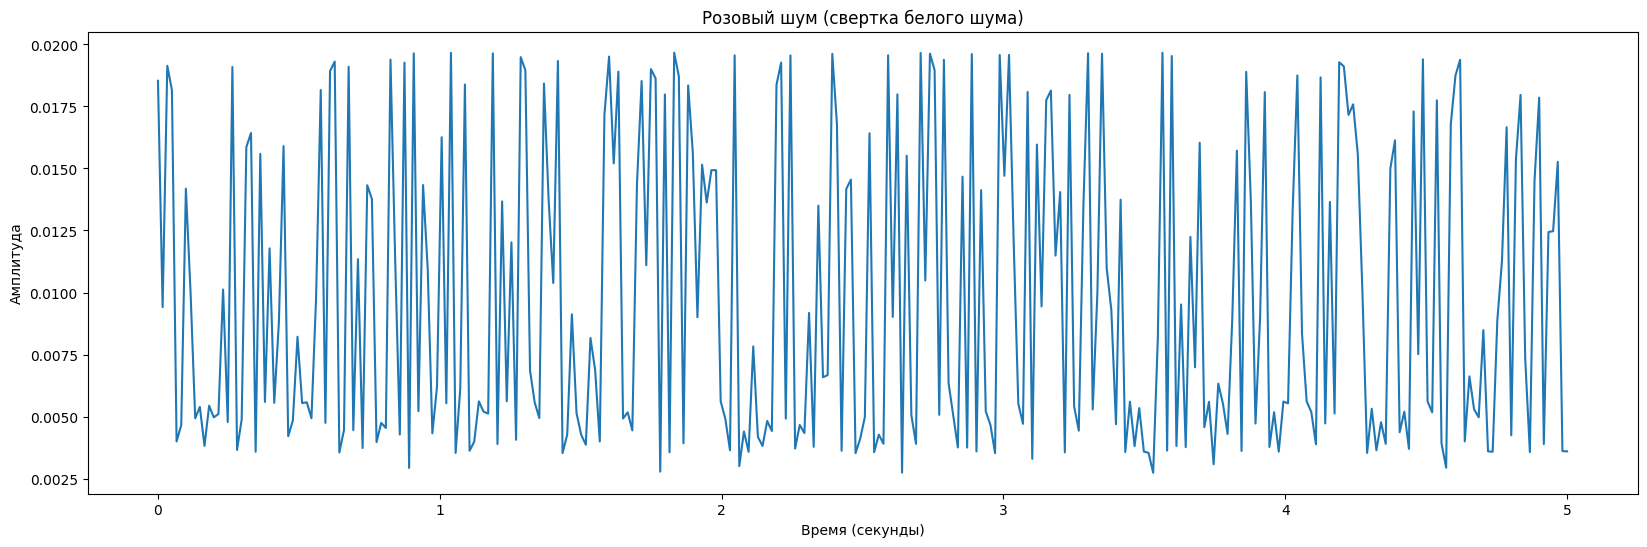

In [17]:
# отрисовываем, что получилось 
# создаем временную шкалу. Считаем, что она начинается с 0, до окончания записи (duretion). 
# Между этими значениями равномерно заполняем ряд time_axis, чтобы в нем оказалось ровно столько элементов, сколько во временном ряду
time_axis = np.linspace(0, duration, len(pink_noise_f)) 

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))  

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(time_axis[:2000], pink_noise_f[:2000])

# заголовки
plt.title('Розовый шум (свертка белого шума)')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()

Задание. Сгенерите розовый шум путем первой генерации сигнала белого шума, преобразования его Фурье, затем деления амплитуд различных частотных составляющих на квадратный корень из частоты.

Вам понадобятся функции np.fft.rfft , np.real , np.sqrt

In [23]:

# генерим белый шум


# генерим розовый щум
def generate_pink_noise(sample_rate, duration):
    white_noise = np.random.randn(int(sample_rate * duration))

    spectrum = np.fft.fft(white_noise)

    frequencies = np.fft.fftfreq(len(spectrum))
    pink_spectrum = spectrum / np.sqrt(np.abs(frequencies))  

    return pink_spectrum.real

# Пример использования
sample_rate = 44100  # Частота дискретизации
duration = 5  # Длительность сигнала в секундах

pink_noise = generate_pink_noise(sample_rate, duration)

print(pink_noise)


[           -inf  42815.39294357 -76549.7301175  ...  56994.02307559
 -76549.7301175   42815.39294357]


C:\Users\pdd\AppData\Local\Temp\ipykernel_8468\1318538573.py:11: RuntimeWarning: divide by zero encountered in divide
  pink_spectrum = spectrum / np.sqrt(np.abs(frequencies))
C:\Users\pdd\AppData\Local\Temp\ipykernel_8468\1318538573.py:11: RuntimeWarning: invalid value encountered in divide
  pink_spectrum = spectrum / np.sqrt(np.abs(frequencies))


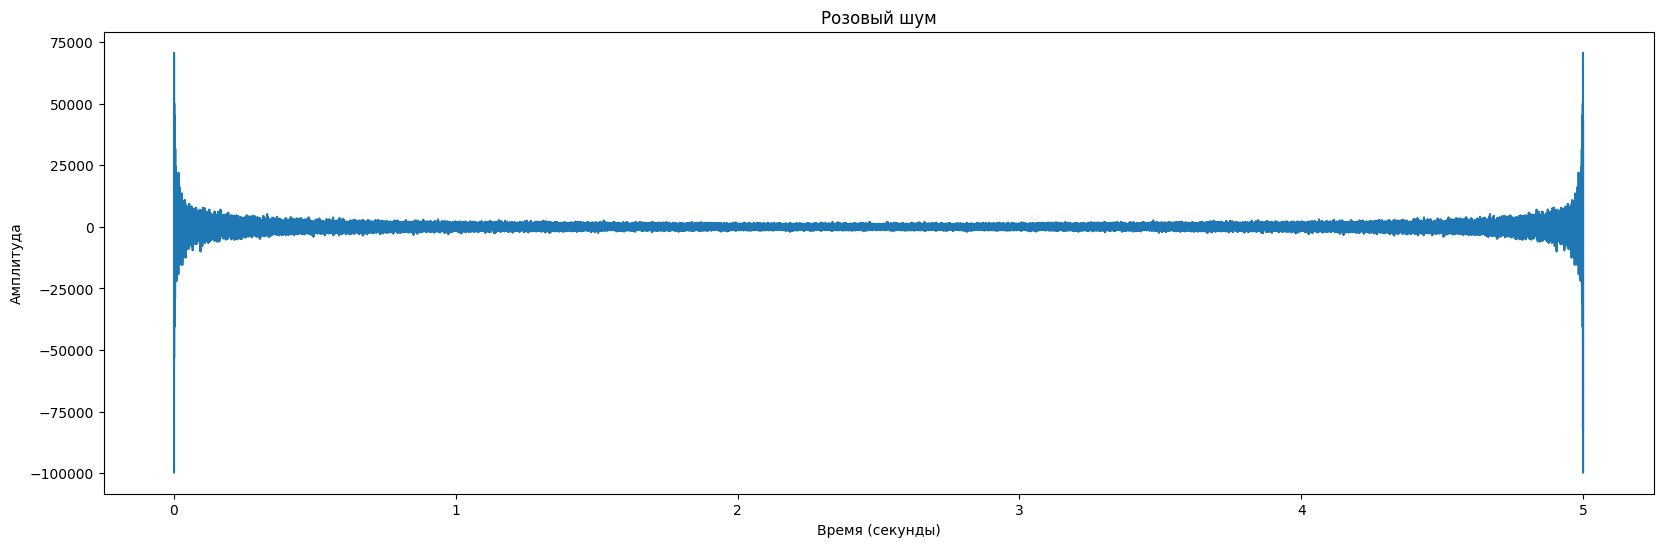

In [24]:
# отрисовываем, что получилось 
# создаем временную шкалу. Считаем, что она начинается с 0, до окончания записи (duretion). 
# Между этими значениями равномерно заполняем ряд time_axis, чтобы в нем оказалось ровно столько элементов, сколько во временном ряду
time_axis = np.linspace(0, duration, len(pink_noise)) 

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))  

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(time_axis, pink_noise)

# заголовки
plt.title('Розовый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()

In [28]:
# слушаем, что получилось
sd.play(pink_noise_f, sample_rate)
sd.wait()

In [26]:
# слушаем, что получилось
sd.play(pink_noise, sample_rate)
sd.wait()

*Черный шум*
Или тишина. Или шум на частотах, которые мы не слышим.

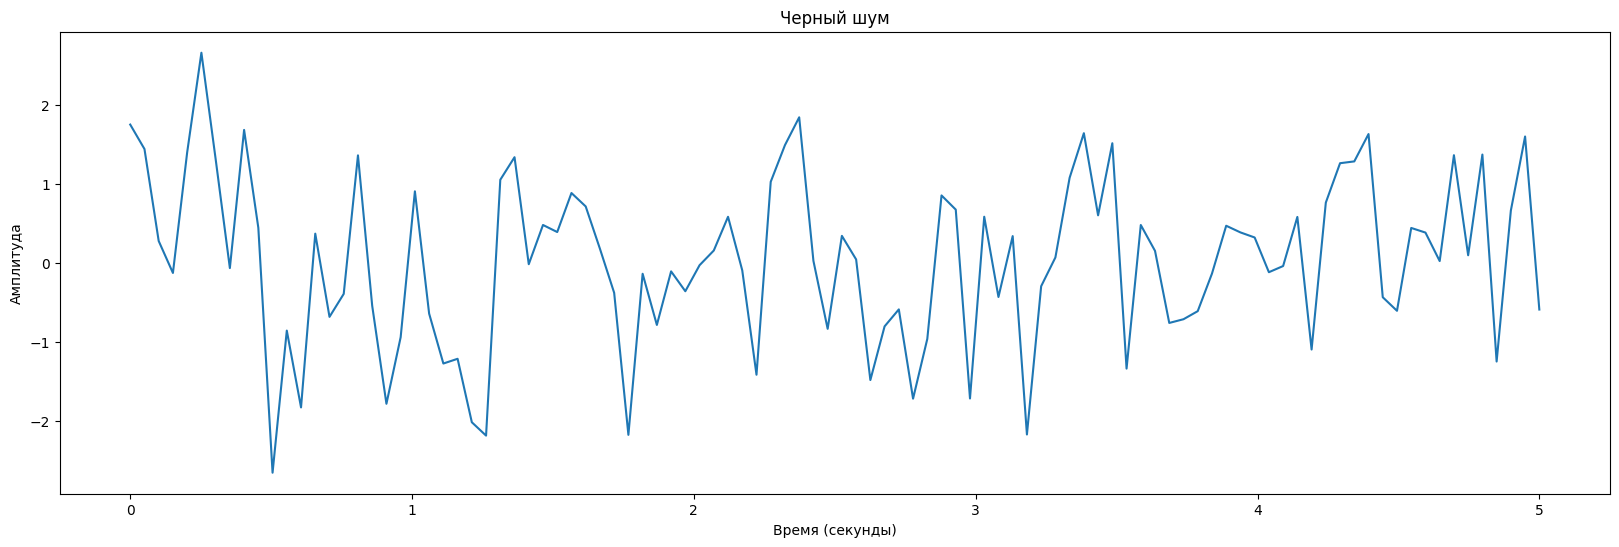

In [25]:
# количество элементов в записи сигнала
num_samples = int(duration * sample_rate)
freq1 = 20000
freq2 = 25000

# Частоты, на которых будем генерировать
num_frequencies = 100  # Количество случайных частот
frequencies = np.linspace(freq1, freq2, num_frequencies) # лист с частотами

black_noise = np.zeros(num_samples)   # подготовили лист для записи сигнала
time_axis = np.arange(num_samples) / sample_rate   # задали временную ось

amplitudes = np.random.normal(0, 1, num_frequencies)  # опять сгенерировали белый гауссовский шум
    
black_noise = np.zeros(num_samples)
time_axis = np.arange(num_samples) / sample_rate
    
for i in range(num_frequencies):
        # надо описать, откуда вы взяли эту формулу
        black_noise += amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * time_axis)
    
#black_noise /= np.max(np.abs(black_noise))  # Нормализация амплитуды к [-1, 1]


# Визуализация
time_axis = np.linspace(0, duration, len(amplitudes))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, amplitudes)
plt.title('Черный шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show()


In [29]:
sd.play(amplitudes, freq1)
sd.wait()

Черный шум - как излучение абсолютно черного тела

Cпектральная плотность мощности излучения известна (непрерывную функцию частоты - f и температуры - T):

![Alt text](image.png)

kB - постоянная Больцмана
h  - Постоянная Планка
c  - скорость света

Поскольку выходная величина должна быть выражена в децибелах, чтобы иметь смысл для звука, мы просто используем логарифмическую шкалу и добавляем смещение (усиление), чтобы нормализовать пик до 0. Уравнение кривой эквалайзера равно:

![Alt text](image-2.png)

Еквалайзер применяем к белому шуму

In [84]:
import scipy

kb =  scipy.constants.k
h = scipy.constants.physical_constants['Planck constant'][0]
c = scipy.constants.c

print(kb)
print(h)
print(c)

T = 17*1/np.power(10, 9)  #Температура 17 нанокельвинов
G = 10

coef1 = 2*h/(c*c*T*T*T)
coef2 = h/(kb*T)

freq1 = 1000

# количество элементов в записи сигнала. Для 17 нанокельвинов полоса пропускания шума будет от 1Гц до 12 кГц
num_samples = int(duration * freq1)


# Частоты, на которых будем генерировать

black_noise = np.zeros(num_samples)   # подготовили лист для записи сигнала
time_axis = np.arange(num_samples) / sample_rate   # задали временную ось



black_noise = np.zeros(num_samples)
time_axis = np.arange(num_samples) / sample_rate
eq = 10 * np.log(coef1*np.power(freq1,3)/(np.exp(coef2*freq1)-1)) + 10 # эквалайзер

white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples) # опять белый шум

black_noise = white_noise_g + eq # применяем преобразование к белому шуму

black_noise /= np.max(np.abs(black_noise))  # Нормализация амплитуды к [-1, 1]

                                         

1.380649e-23
6.62607015e-34
299792458.0


In [88]:
# так звучит черное тело

sd.play(black_noise, freq1)
sd.wait()

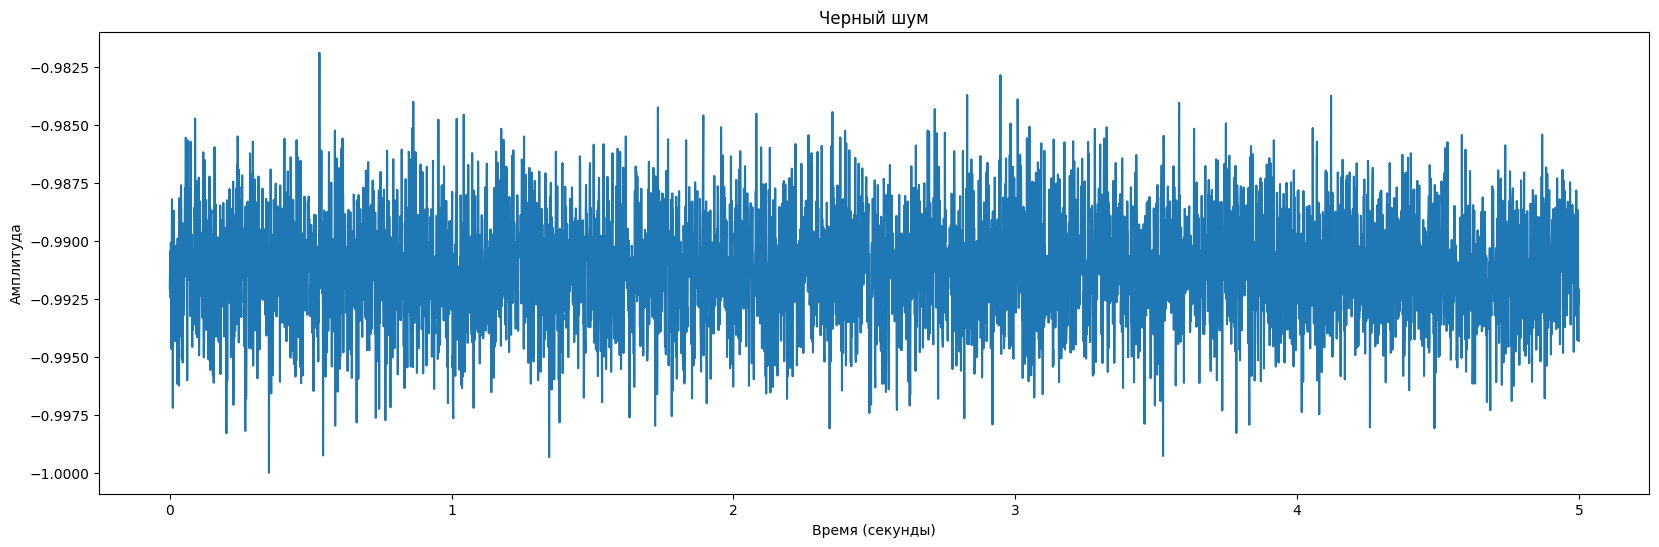

In [86]:
# Визуализация
time_axis = np.linspace(0, duration, len(black_noise))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, black_noise)
plt.title('Черный шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show()

## Генерация временных рядов

Этот код создает пример временного ряда, представленного как синусоида с добавлением случайного шума. Это просто пример, можно изменить генерацию данных в соответствии с вашими потребностями.

In [39]:
duration = 5  # Продолжительность в секундах
sample_rate = 4100  # Частота дискретизации в Гц

num_points = duration*sample_rate  # количество точек

time_points = np.linspace(0, duration, num_points)  # Создаем равномерные временные точки от 0 до 5 секунд

white_noise_base = np.random.normal(0,1,size=num_points)  # Генерим белый шум

values = 10*np.sin(4*time_points*np.pi) # вычисляем амплитуды сигнала по синусоидальному закону

values_noise = values + white_noise_base # зашумляем сигнал



C:\Users\pdd\AppData\Local\Temp\ipykernel_8468\497981575.py:27: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c0, c1, c2],


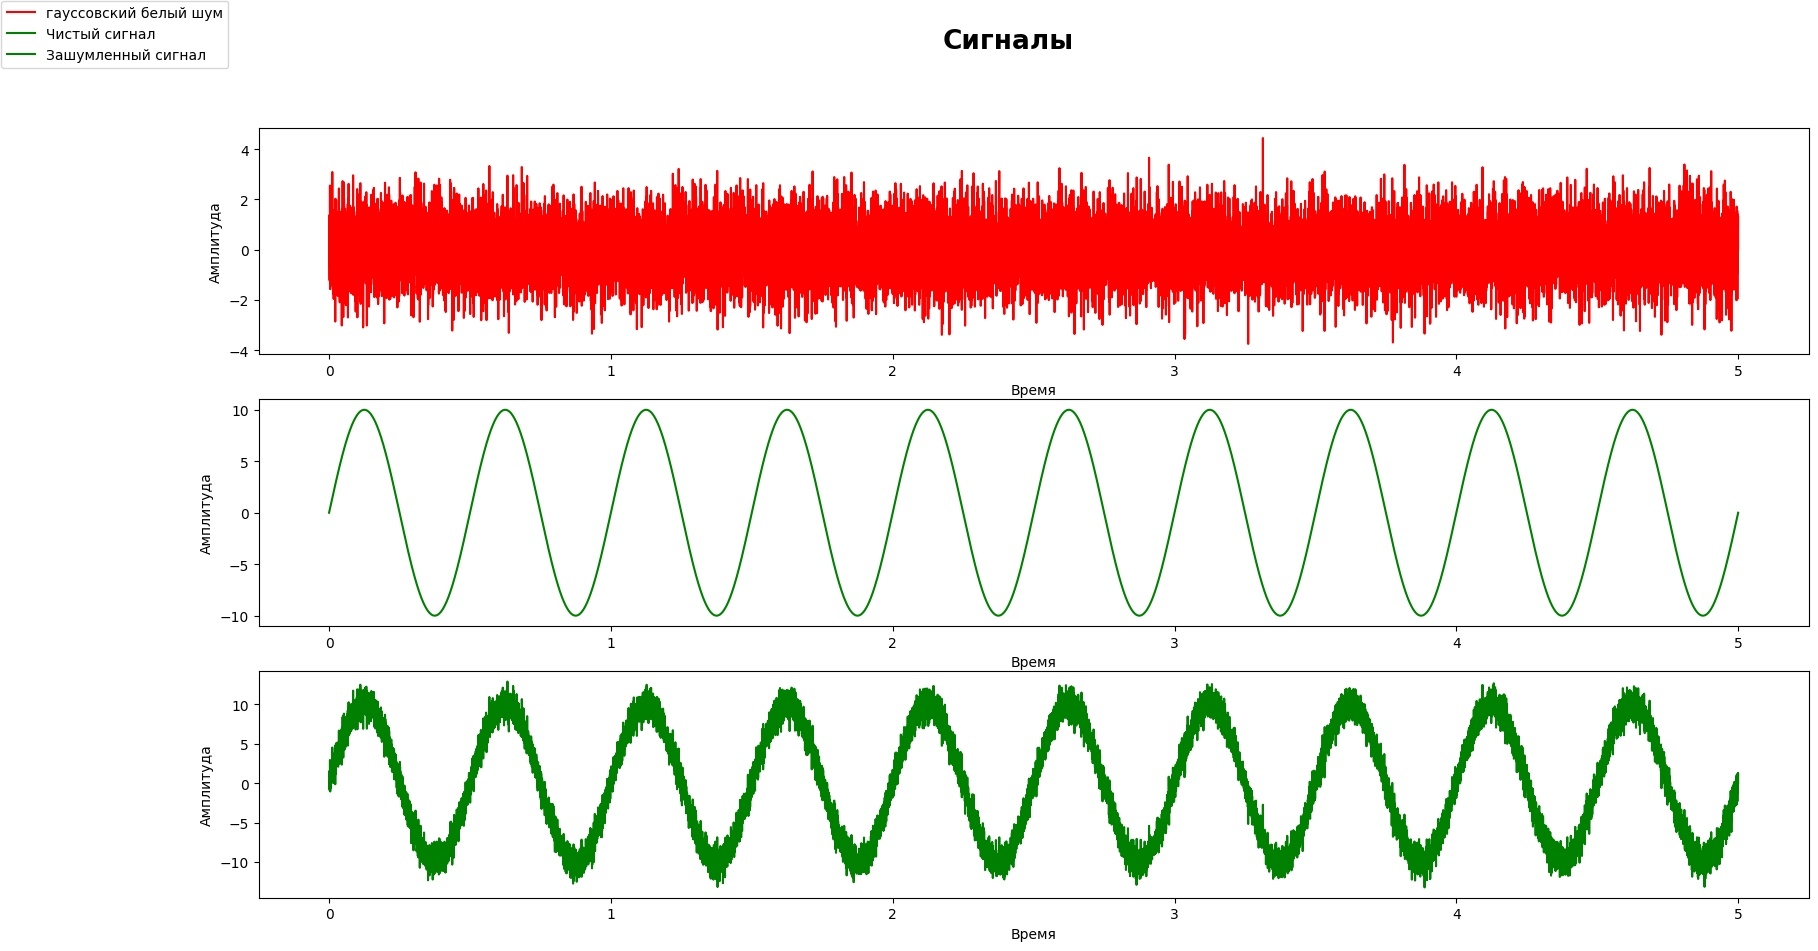

In [40]:
# Отрисовываем
# хотим нарисовать все на одном рисунке. Нам нужно 3 рисунка, один под другим.
fig, axs = plt.subplots(3, 1, figsize=(20, 10))


# общий заголовок для всей картинки
fig.suptitle('Сигналы', fontsize=19, fontweight='bold')

labels = ["гауссовский белый шум", "Чистый сигнал", "Зашумленный сигнал"]

# определяем, что будем отрисовывать на 1 графике. По x - время, по y - амплитуды
c0 = axs[0].plot(time_points, white_noise_base, color="red")
axs[0].set_xlabel('Время')
axs[0].set_ylabel('Амплитуда')

# определяем, что будем отрисовывать. По x - время, по y - амплитуды
c1 = axs[1].plot(time_points, values, color="green")
axs[1].set_xlabel('Время')
axs[1].set_ylabel('Амплитуда')

# определяем, что будем отрисовывать. По x - время, по y - амплитуды
c2 = axs[2].plot(time_points, values_noise, color="green")
axs[2].set_xlabel('Время')
axs[2].set_ylabel('Амплитуда')

# отрисовываем общую легенду
fig.legend([c0, c1, c2],
           labels=labels,
           loc='upper left',
           borderaxespad=0.1)

